# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(X.data.shape)

(400, 4096)


## Actividad en clase

Vamos a trabajar este dataset usando **kNN** y **LOF**. Para esto haga lo siguiente:

- Aplique min-max scaler al dataset.
- Transforme el dataset con PCA para retener el 95% de la varianza.
- Sobre el dataset, construya un **kNN** usando fuerza bruta en base a dos vecinos. Encuentre el ejemplo más cercano del dato 100.
- Sobre el dataset, construya un **kNN** usando kd-tree en base a dos vecinos. Encuentre el ejemplo más cercano del dato 100. 
- Sobre el dataset, construya un **kNN** usando ball tree en base a dos vecinos. Encuentre el ejemplo más cercano del dato 100. 
- Vamos a construir un clasificador sobre 5 vecinos. Para eso, use la variable target como variable a predecir. Luego muestre el classification report del clasificador.
- Detecte outliers en base a 5 vecinos. Plotee la distribución de LOF scores y elija un umbral de corte. Determine el % del dataset que está bajo el umbral. 
- Use el % del gráfico anterior como parámetro de contaminación.
- ¿Cuáles son los dos sujetos que tienen más imágenes outliers?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***

### Aplicamos MinMaxScaler

In [2]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Descomponemos a 400

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

### Calculamos cuántas componentes retienen el 95% de la varianza

In [4]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 90% de la varianza del dataset original
min_var(0.95,pca.explained_variance_ratio_)

121

### Proyectamos usando PCA a k = 121

In [5]:
pca = PCA(n_components=121)
X_= pca.fit_transform(X)

### Fuerza bruta (pairwise matrix)

In [6]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute', metric='euclidean').fit(X_)
distances, indices = nbrs.kneighbors(X_)

In [7]:
indices[100,:]

array([100, 109])

## Ahora vamos a hacer lo mismo con un kd-tree

In [8]:
from sklearn.neighbors import KDTree

kdt = KDTree(X_, metric ='euclidean')
distances, indices = kdt.query(X_, k=2)

In [9]:
indices[100,:]

array([100, 109])

## Y con un ball-tree

In [10]:
from sklearn.neighbors import BallTree

ball = BallTree(X_, metric='euclidean')
distances, indices = ball.query(X_, k=2)

In [11]:
indices[100,:]

array([100, 109])

## Ahora vamos con el clasificador

In [12]:
y = faces.target

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train, y_train)

In [15]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.60      1.00      0.75         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         4
          14       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.80    

/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcelo/.local/lib/python3.10/site-p

## Finalmente vamos a detectar outliers usando LOF

In [16]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X_)
scores = lof.negative_outlier_factor_

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

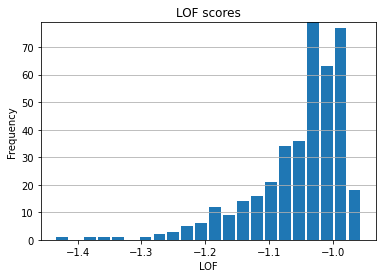

In [18]:
plot_hist(scores, 'LOF scores')

In [19]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

lof_threshold(-1.25,scores)

0.0175

In [20]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0175)
labels = lof.fit_predict(X_)

In [21]:
indices = np.where(labels < 0)
outliers = X_[indices]

In [22]:
y[indices]

array([ 7, 19, 19, 31, 34, 34])

### el 19 y el 34